In [0]:
%python
import urllib
urllib.urlretrieve("https://s3-ap-southeast-2.amazonaws.com/variant-spark/datasets/hipsterIndex/hipster_genomewide_001_1000.vcf.bz2",
                   "/tmp/hipster_genomewide_001_1000.vcf.bz2")
urllib.urlretrieve("https://s3-ap-southeast-2.amazonaws.com/variant-spark/datasets/hipsterIndex/hipster_labels.txt", "/tmp/hipster_labels.txt")
dbutils.fs.mv("file:/tmp/hipster_genomewide_001_1000.vcf.bz2", "dbfs:/vs-datasets/hipsterIndex/hipster_genomewide_001_1000.vcf.bz2")
dbutils.fs.mv("file:/tmp/hipster_labels.txt", "dbfs:/vs-datasets/hipsterIndex/hipster_labels.txt")
display(dbutils.fs.ls("dbfs:/vs-datasets/hipsterIndex"))

path,name,size
dbfs:/vs-datasets/hipsterIndex/hail_pvals.csv,hail_pvals.csv,342217
dbfs:/vs-datasets/hipsterIndex/hipster.vcf,hipster.vcf,173024889
dbfs:/vs-datasets/hipsterIndex/hipster.vcf.bz2,hipster.vcf.bz2,1448482
dbfs:/vs-datasets/hipsterIndex/hipster_genomewide_001_1000.vcf.bz2,hipster_genomewide_001_1000.vcf.bz2,8697531
dbfs:/vs-datasets/hipsterIndex/hipster_labels.txt,hipster_labels.txt,33550


In [0]:
%scala
import au.csiro.variantspark.api.VSContext
import au.csiro.variantspark.api.ImportanceAnalysis
implicit val vsContext = VSContext(spark)

val featureSource = vsContext.featureSource("/vs-datasets/hipsterIndex/hipster_genomewide_001_1000.vcf.bz2")
val labelSource  = vsContext.labelSource("/vs-datasets/hipsterIndex/hipster_labels.txt", "label")
val importanceAnalysis = ImportanceAnalysis(featureSource, labelSource, nTrees = 1000)
val variableImportance = importanceAnalysis.variableImportance
variableImportance.cache().registerTempTable("importance")
display(variableImportance)

variable,importance
1_100715,0.0
1_565136,4.187410560586536E-8
1_740416,1.1765866171196905E-7
1_754580,0.0
1_764500,2.0207958833650437E-8
1_786479,0.0
1_795173,0.0
1_814371,1.408350101906669E-6
1_917401,0.0
1_920298,0.0


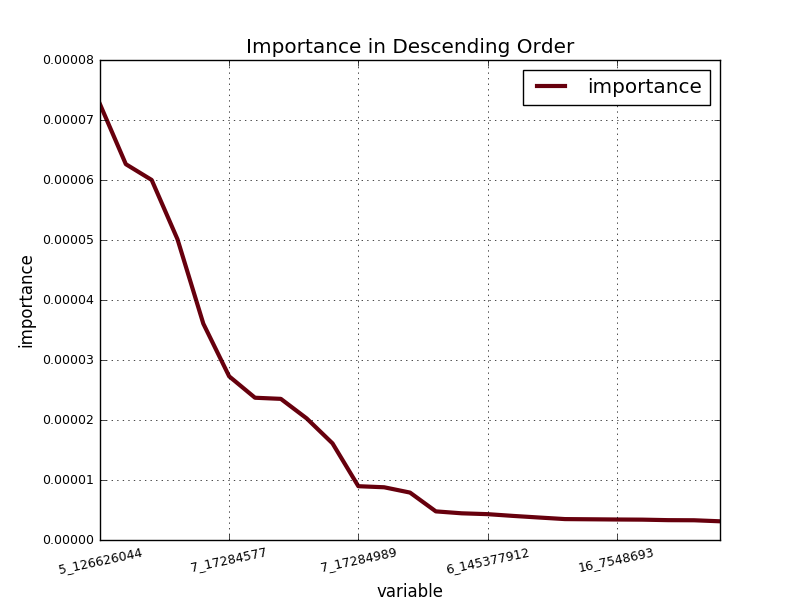

In [0]:
%python
import matplotlib.pyplot as plt
importance = sqlContext.sql("select * from importance order by importance desc limit 25")
importanceDF = importance.toPandas()
ax = importanceDF.plot(x="variable", y="importance",lw=3,colormap='Reds_r',title='Importance in Descending Order', fontsize=9)
ax.set_xlabel("variable")
ax.set_ylabel("importance")
plt.xticks(rotation=12)
plt.grid(True)
plt.show()
display()

###Credit

CSIRO Transformational Bioinformatics team has developed VariantSpark and put together this illustrative example. Thank you to Lynn Langit for input on the presentation of this notebook.